In [1]:
import pandas as pd
import ast

In [2]:
import numpy as np

In [3]:
data = pd.read_csv("Employees.csv")

In [4]:
data = data.rename(columns={"['Sales tactic', 'Storytelling', 'Relation building']":"interest"})
data

,1,Piper Dingledine,Piper.Dingledine@fakegame.com,7,Fake mobile game,Sales,interest
0,2,Dennis Cardenas,Dennis.Cardenas@fakegame.com,7,Fake mobile game,Director,"['Strategic Thinking', 'Communication', 'Decis..."
1,3,William Mooney,William.Mooney@fakegame.com,7,Fake mobile game,Programmer,"['Perseverance', 'Self-Motivation', 'Independe..."
2,4,Ashley Rifkin,Ashley.Rifkin@fakegame.com,7,Fake mobile game,Sales,"['Sales tactic', 'Storytelling', 'Relation bui..."
3,5,Lisa Yruegas,Lisa.Yruegas@fakegame.com,7,Fake mobile game,Director,"['Strategic Thinking', 'Communication', 'Decis..."
4,6,Ellen Smith,Ellen.Smith@fakegame.com,7,Fake mobile game,IT,"['Problem solving', 'Automation', 'Daily techn..."
...,...,...,...,...,...,...,...
94,96,Jan Knock,Jan.Knock@fakegame.com,100,Admin,IT,"['Problem solving', 'Automation', 'Daily techn..."
95,97,Sandra Bellomo,Sandra.Bellomo@fakegame.com,94,Office management,Office management,"['Budgeting', 'Events']"
96,98,David Gieck,David.Gieck@fakegame.com,97,Office management,Office management,"['Budgeting', 'Events']"
97,99,Bob Toman,Bob.Toman@fakegame.com,97,Office management,Office management,"['Budgeting', 'Office supplies']"


In [10]:
all_int = np.array([])
for i, elem in enumerate(list(data["interest"])):
    res = ast.literal_eval(elem)
    all_int = np.concatenate((all_int, res))

In [11]:
all_int_un = np.unique(all_int)

In [12]:
all_int_un

array(['Automation', 'Budgeting', 'Communication', 'Conference',
       'Daily technologies', 'Decision Making', 'Drinking', 'Events',
       'Hiring', 'Independence', 'Linux', 'Office supplies',
       'People Management', 'Perseverance', 'Problem solving',
       'Recruitment', 'Relation building', 'Sales tactic',
       'Self-Motivation', 'Storytelling', 'Strategic Planning',
       'Strategic Thinking'], dtype='<U32')

In [13]:
names = data['Piper Dingledine'].unique()

In [14]:
byteam = data.groupby('7')['Piper Dingledine'].unique()

In [15]:
byteam = byteam.reset_index()

In [16]:
bysph = data.groupby('Fake mobile game')['Piper Dingledine'].unique()

In [17]:
bysph = bysph.reset_index()

In [18]:
bysales = data.groupby('Sales')['Piper Dingledine'].unique()

In [19]:
bysales = bysales.reset_index()

In [20]:
name = 'David Gieck'

In [21]:
for i, elem in enumerate(list(bysales['Piper Dingledine'])):
    if name in elem:
        print(bysales.iloc[i])
        sls = elem
        
for i, elem in enumerate(list(bysph['Piper Dingledine'])):
    if name in elem:
        print(bysph.iloc[i])
        sph = elem
        
for i, elem in enumerate(list(byteam['Piper Dingledine'])):
    if name in elem:
        print(byteam.iloc[i])
        team = elem

Sales                                      Office management
Piper Dingledine    [Sandra Bellomo, David Gieck, Bob Toman]
Name: 7, dtype: object
Fake mobile game                                    Office management
Piper Dingledine    [Rebecca Franklin, Sandra Bellomo, David Gieck...
Name: 10, dtype: object
7                                         97
Piper Dingledine    [David Gieck, Bob Toman]
Name: 11, dtype: object


In [22]:
import networkx as nx
G = nx.Graph()


In [23]:
import matplotlib.pyplot as plt

In [24]:
G.add_nodes_from(sph)

In [25]:
for elem in sph:
    if elem != name:
        G.add_edge(name, elem)

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


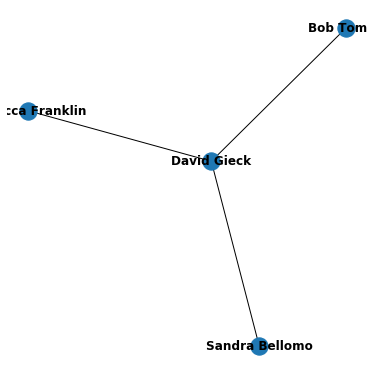

In [26]:
plt.figure(figsize=(5,5))
# plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [27]:
import math
import numpy as np
import pandas as pd

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle

from itertools import chain

In [28]:
def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=3, name=name)

In [29]:
def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(x_range=xr, y_range=yr, **cvsopts)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

In [30]:
import networkx as nx

def ng(graph,name):
    graph.name = name
    return graph

def nx_layout(graph):
    layout = nx.circular_layout(graph)
    data = [[node]+layout[node].tolist() for node in graph.nodes]

    nodes = pd.DataFrame(data, columns=['id', 'x', 'y'])
    nodes.set_index('id', inplace=True)

    edges = pd.DataFrame(list(graph.edges), columns=['source', 'target'])
    return nodes, edges

def nx_plot(graph, name=""):
    print(graph.name, len(graph.edges))
    nodes, edges = nx_layout(graph)
    
    direct = connect_edges(nodes, edges)
    bundled_bw005 = hammer_bundle(nodes, edges)
    bundled_bw030 = hammer_bundle(nodes, edges, initial_bandwidth=0.30)

    return [graphplot(nodes, direct,         graph.name),
            graphplot(nodes, bundled_bw005, "Bundled bw=0.05"),
            graphplot(nodes, bundled_bw030, "Bundled bw=0.30")]

Complete 1225
Lollipop 1230
Barbell 2453
Ladder 148
Circular Ladder 150
Star 50
Cycle 50


Complete,Bundled bw=0.05,Bundled bw=0.30
Lollipop,Bundled bw=0.05,Bundled bw=0.30
Barbell,Bundled bw=0.05,Bundled bw=0.30
Ladder,Bundled bw=0.05,Bundled bw=0.30
Circular Ladder,Bundled bw=0.05,Bundled bw=0.30
Star,Bundled bw=0.05,Bundled bw=0.30
Cycle,Bundled bw=0.05,Bundled bw=0.30

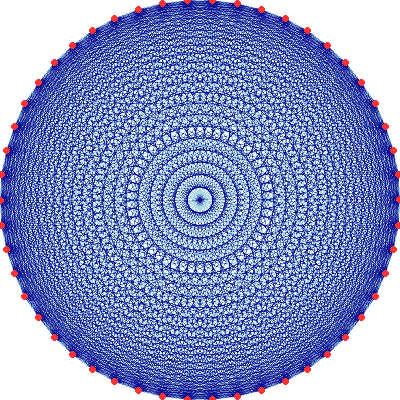
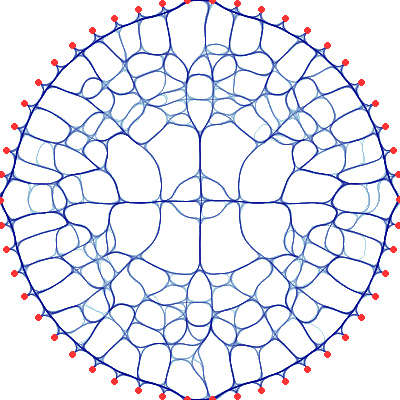
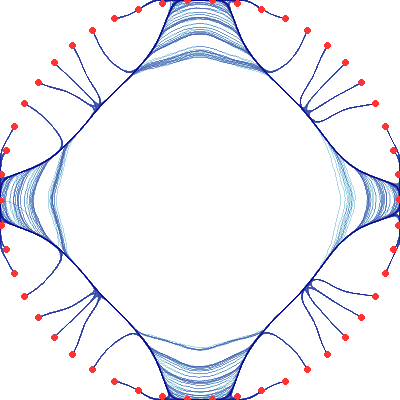
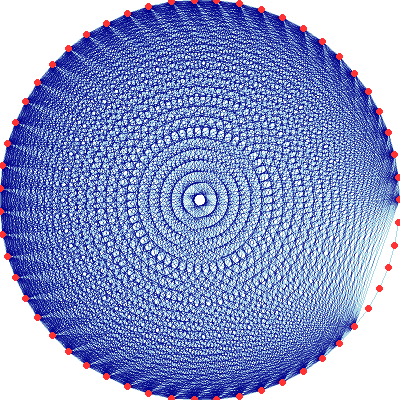
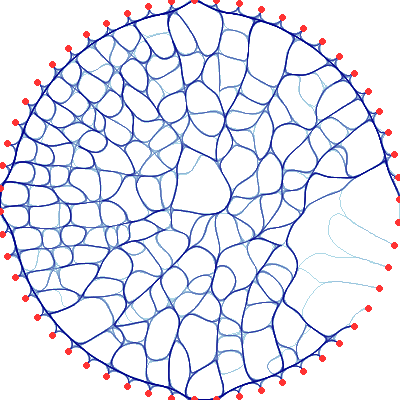
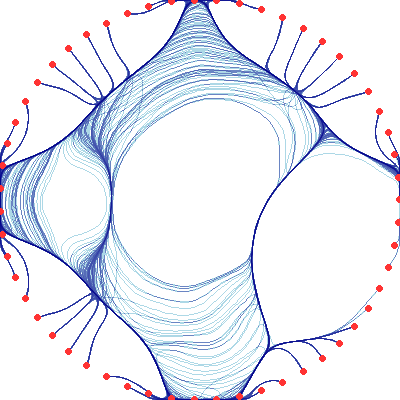
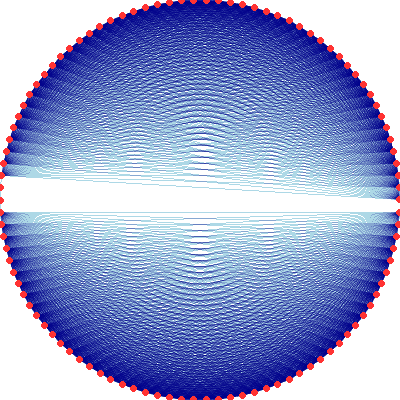
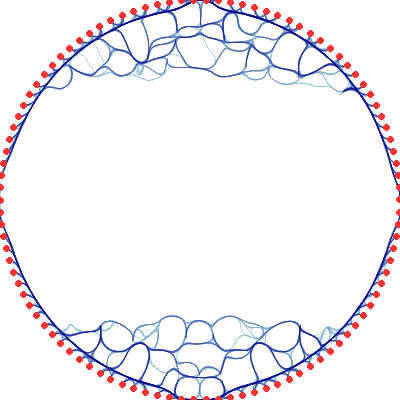
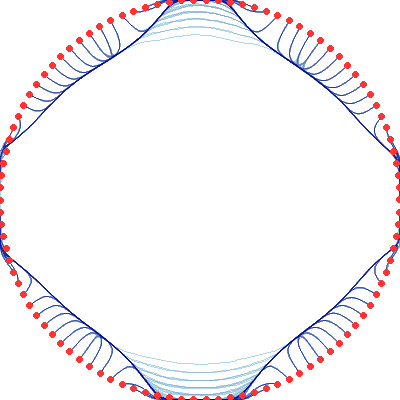
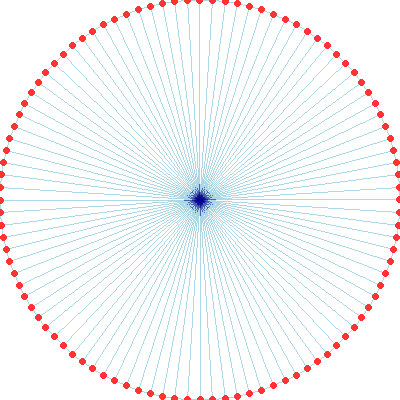
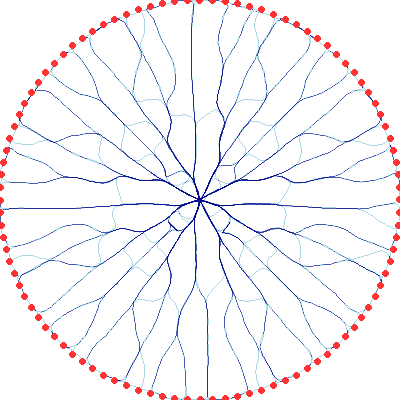
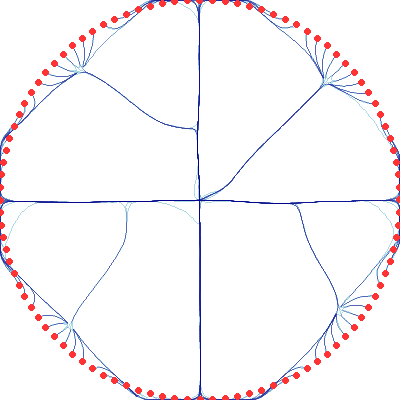
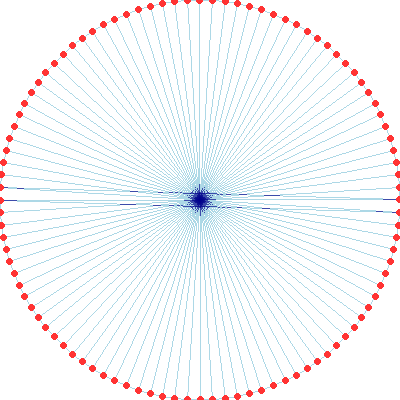
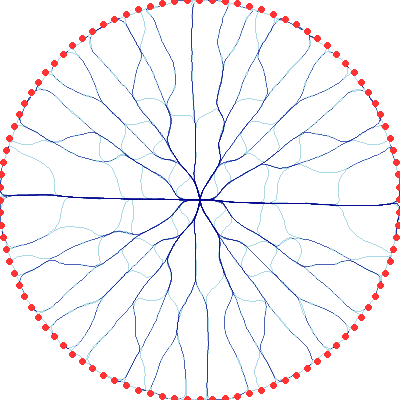
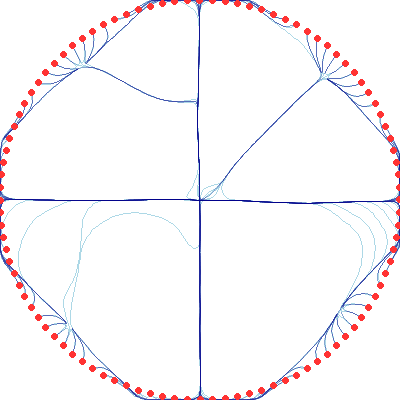
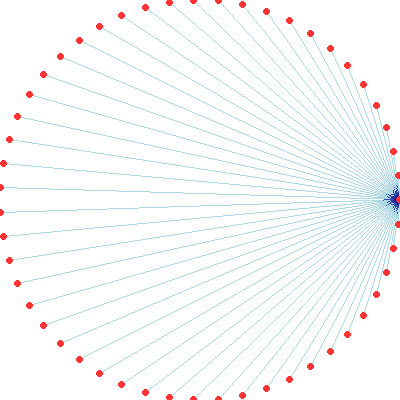
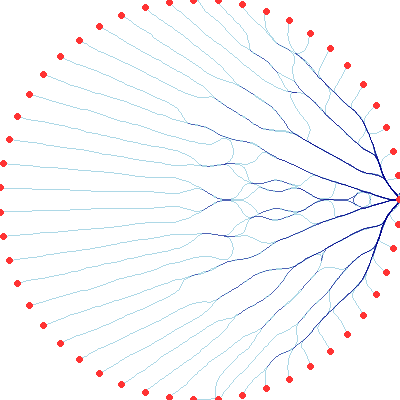
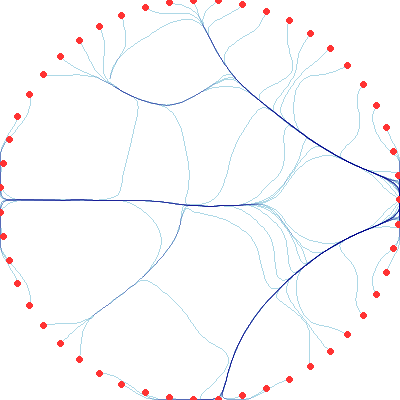
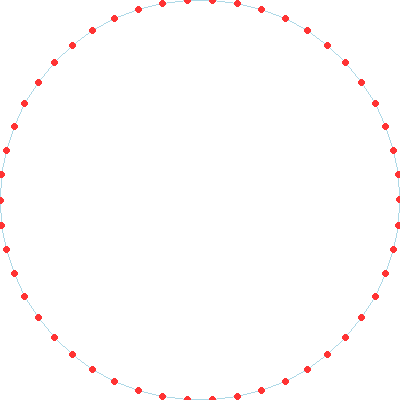
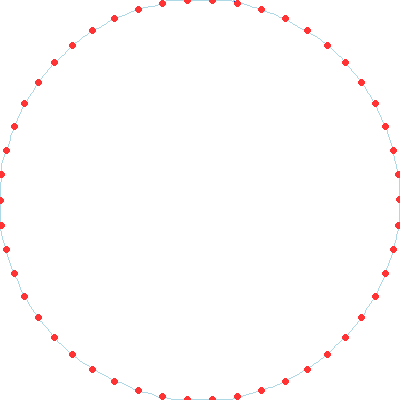
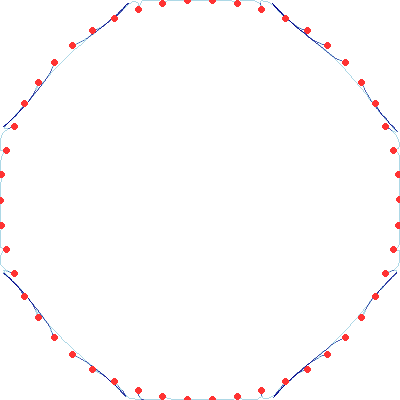

In [31]:
n=50
cvsopts = dict(plot_height=400, plot_width=400)
plots = [nx_plot(g) for g in
           [ng(nx.complete_graph(n),        name="Complete"), 
            ng(nx.lollipop_graph(n, 5),     name="Lollipop"),     
            ng(nx.barbell_graph(n,2),       name="Barbell"),
            ng(nx.ladder_graph(n),          name="Ladder"),   
            ng(nx.circular_ladder_graph(n), name="Circular Ladder"), 
            ng(nx.star_graph(n),            name="Star"),
            ng(nx.cycle_graph(n),           name="Cycle")]]

tf.Images(*chain.from_iterable(plots)).cols(3)

In [32]:
G = nx.Graph()
G.add_nodes_from(names)


In [33]:
int_names = {}
for i, name in enumerate(names):
    interests = data.iloc[i]['interest']
    interests = ast.literal_eval(interests)
    int_names[name] = interests

In [34]:
int_names

{'Dennis Cardenas': ['Strategic Thinking', 'Communication', 'Decision Making'],
 'William Mooney': ['Perseverance', 'Self-Motivation', 'Independence'],
 'Ashley Rifkin': ['Sales tactic', 'Storytelling', 'Relation building'],
 'Lisa Yruegas': ['Strategic Thinking', 'Communication', 'Decision Making'],
 'Ellen Smith': ['Problem solving', 'Automation', 'Daily technologies'],
 'Dotty Deason': ['People Management', 'Budgeting', 'Hiring'],
 'Nickolas McCarney': ['Strategic Thinking',
  'Communication',
  'Decision Making'],
 'Dennis Gist': ['Problem solving', 'Automation', 'Daily technologies'],
 'Juanita Delabarre': ['Problem solving', 'Automation', 'Daily technologies'],
 'Nancy Villanueva': ['Perseverance', 'Self-Motivation', 'Independence'],
 'Samuel Iaccarino': ['Perseverance', 'Self-Motivation', 'Independence'],
 'Julie Lams': ['Strategic Thinking', 'Communication', 'Decision Making'],
 'Bernice Schuck': ['Strategic Thinking', 'Communication', 'Decision Making'],
 'Tanner Harrington': 

In [35]:
graph_int = {}
for name in names:
    int_name = int_names[name]
    graph_int[name] = []
    for int_ in int_name:
        for name_ in names:
            if name_ != name:
                if int_ in int_names[name_]:
                    graph_int[name].append(name_)

In [36]:
for name in names:
    names_from_int, numb = np.unique(graph_int[name], return_counts=True)
    for i, name_ in enumerate(names_from_int):
        G.add_edges_from([(name, name_)], weight=numb[i])

In [37]:
tf.Image(nx_plot(G))

 975


 975


,Bundled bw=0.05,Bundled bw=0.30

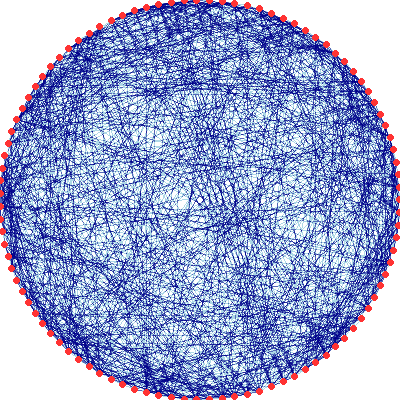
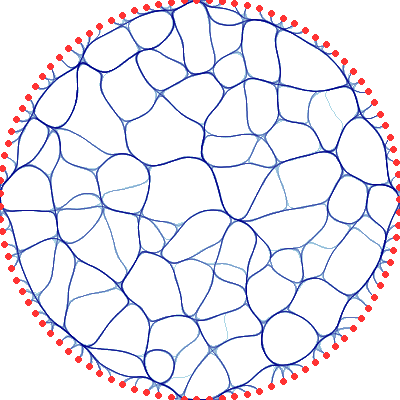
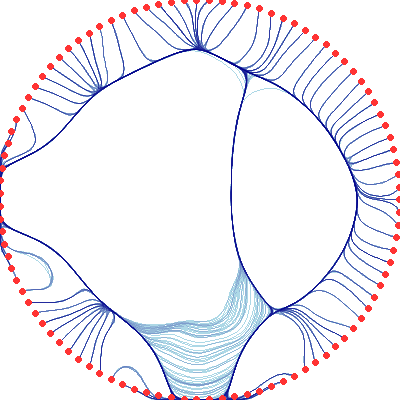

In [38]:
cvsopts = dict(plot_height=400, plot_width=400)
plots = [nx_plot(g) for g in
           [G]]

tf.Images(*chain.from_iterable(plots)).cols(3)

In [39]:
pos = nx.layout.fruchterman_reingold_layout(G, iterations=30)

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


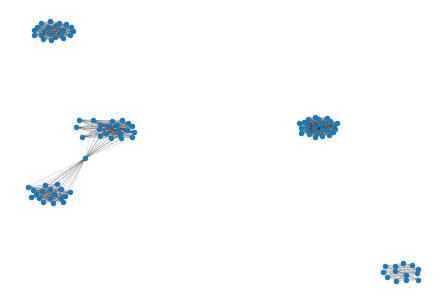

In [40]:
nx.draw(G, pos=pos, with_labels=False, node_size=20, width=0.1)
plt.savefig('graph')

In [42]:
from community import best_partition

In [52]:
for name in names:
    if best_partition(G)[name] == 0:
        print(int_names[name])
        print(data[data['Piper Dingledine'] == name]['Sales'], data[data['Piper Dingledine'] == name]['Fake mobile game'], data[data['Piper Dingledine'] == name]['7'])

['Strategic Thinking', 'Communication', 'Decision Making']
0    Director
Name: Sales, dtype: object 0    Fake mobile game
Name: Fake mobile game, dtype: object 0    7
Name: 7, dtype: int64
['Strategic Thinking', 'Communication', 'Decision Making']
3    Director
Name: Sales, dtype: object 3    Fake mobile game
Name: Fake mobile game, dtype: object 3    7
Name: 7, dtype: int64
['Strategic Thinking', 'Communication', 'Decision Making']
6    Director
Name: Sales, dtype: object 6    Fake mobile game
Name: Fake mobile game, dtype: object 6    7
Name: 7, dtype: int64
['Strategic Thinking', 'Communication', 'Decision Making']
11    Director
Name: Sales, dtype: object 11    Prototype mobile game
Name: Fake mobile game, dtype: object 11    16
Name: 7, dtype: int64
['Strategic Thinking', 'Communication', 'Decision Making']
12    Director
Name: Sales, dtype: object 12    Prototype mobile game
Name: Fake mobile game, dtype: object 12    16
Name: 7, dtype: int64
['Strategic Thinking', 'Communication

In [53]:
for name in names:
    if best_partition(G)[name] == 1:
        print(int_names[name])
        print(data[data['Piper Dingledine'] == name]['Sales'], data[data['Piper Dingledine'] == name]['Fake mobile game'], data[data['Piper Dingledine'] == name]['7'])

['Perseverance', 'Self-Motivation', 'Independence']
1    Programmer
Name: Sales, dtype: object 1    Fake mobile game
Name: Fake mobile game, dtype: object 1    7
Name: 7, dtype: int64
['Perseverance', 'Self-Motivation', 'Independence']
9    Programmer
Name: Sales, dtype: object 9    Prototype mobile game
Name: Fake mobile game, dtype: object 9    16
Name: 7, dtype: int64
['Perseverance', 'Self-Motivation', 'Independence']
10    Programmer
Name: Sales, dtype: object 10    Prototype mobile game
Name: Fake mobile game, dtype: object 10    16
Name: 7, dtype: int64
['Perseverance', 'Self-Motivation', 'Independence']
14    Programmer
Name: Sales, dtype: object 14    Prototype mobile game
Name: Fake mobile game, dtype: object 14    30
Name: 7, dtype: int64
['Perseverance', 'Self-Motivation', 'Independence']
16    Programmer
Name: Sales, dtype: object 16    Prototype mobile game
Name: Fake mobile game, dtype: object 16    16
Name: 7, dtype: int64
['Perseverance', 'Self-Motivation', 'Independen

In [54]:
for name in names:
    if best_partition(G)[name] == 2:
        print(int_names[name])
        print(data[data['Piper Dingledine'] == name]['Sales'], data[data['Piper Dingledine'] == name]['Fake mobile game'], data[data['Piper Dingledine'] == name]['7'])

['Sales tactic', 'Storytelling', 'Relation building']
2    Sales
Name: Sales, dtype: object 2    Fake mobile game
Name: Fake mobile game, dtype: object 2    7
Name: 7, dtype: int64
['Sales tactic', 'Storytelling', 'Relation building']
33    Sales
Name: Sales, dtype: object 33    Outsourcing team
Name: Fake mobile game, dtype: object 33    41
Name: 7, dtype: int64
['Sales tactic', 'Storytelling', 'Relation building']
46    Sales
Name: Sales, dtype: object 46    Outsourcing team
Name: Fake mobile game, dtype: object 46    41
Name: 7, dtype: int64
['Sales tactic', 'Storytelling', 'Relation building']
53    Sales
Name: Sales, dtype: object 53    Operation team
Name: Fake mobile game, dtype: object 53    100
Name: 7, dtype: int64
['Sales tactic', 'Storytelling', 'Relation building']
56    Sales
Name: Sales, dtype: object 56    Operation team
Name: Fake mobile game, dtype: object 56    55
Name: 7, dtype: int64
['Sales tactic', 'Storytelling', 'Relation building']
57    Sales
Name: Sales, dty

In [55]:
for name in names:
    if best_partition(G)[name] == 3:
        print(int_names[name])
        print(data[data['Piper Dingledine'] == name]['Sales'], data[data['Piper Dingledine'] == name]['Fake mobile game'], data[data['Piper Dingledine'] == name]['7'])

['Problem solving', 'Automation', 'Daily technologies']
4    IT
Name: Sales, dtype: object 4    Fake mobile game
Name: Fake mobile game, dtype: object 4    7
Name: 7, dtype: int64
['Problem solving', 'Automation', 'Daily technologies']
7    IT
Name: Sales, dtype: object 7    Fake mobile game
Name: Fake mobile game, dtype: object 7    7
Name: 7, dtype: int64
['Problem solving', 'Automation', 'Daily technologies']
8    IT
Name: Sales, dtype: object 8    Prototype mobile game
Name: Fake mobile game, dtype: object 8    16
Name: 7, dtype: int64
['Problem solving', 'Automation', 'Daily technologies']
17    IT
Name: Sales, dtype: object 17    Prototype mobile game
Name: Fake mobile game, dtype: object 17    16
Name: 7, dtype: int64
['Problem solving', 'Automation', 'Daily technologies']
18    IT
Name: Sales, dtype: object 18    Karma mobile game
Name: Fake mobile game, dtype: object 18    25
Name: 7, dtype: int64
['Problem solving', 'Automation', 'Daily technologies']
24    IT
Name: Sales, dt

In [56]:
for name in names:
    if best_partition(G)[name] == 4:
        print(int_names[name])
        print(data[data['Piper Dingledine'] == name]['Sales'], data[data['Piper Dingledine'] == name]['Fake mobile game'], data[data['Piper Dingledine'] == name]['7'])

['People Management', 'Budgeting', 'Hiring']
5    Manager
Name: Sales, dtype: object 5    Fake mobile game
Name: Fake mobile game, dtype: object 5    100
Name: 7, dtype: int64
['People Management', 'Budgeting', 'Hiring']
13    Manager
Name: Sales, dtype: object 13    Prototype mobile game
Name: Fake mobile game, dtype: object 13    16
Name: 7, dtype: int64
['People Management', 'Budgeting', 'Hiring']
22    Manager
Name: Sales, dtype: object 22    Karma mobile game
Name: Fake mobile game, dtype: object 22    25
Name: 7, dtype: int64
['People Management', 'Budgeting', 'Hiring']
25    Manager
Name: Sales, dtype: object 25    Karma mobile game
Name: Fake mobile game, dtype: object 25    25
Name: 7, dtype: int64
['People Management', 'Recruitment', 'Hiring']
27    HR
Name: Sales, dtype: object 27    HR
Name: Fake mobile game, dtype: object 27    30
Name: 7, dtype: int64
['People Management', 'Recruitment', 'Communication']
28    Manager
Name: Sales, dtype: object 28    HR
Name: Fake mobile 